<a href="https://colab.research.google.com/github/ishhverma/artificial-intelligence-projects/blob/main/p1_Handwritten_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


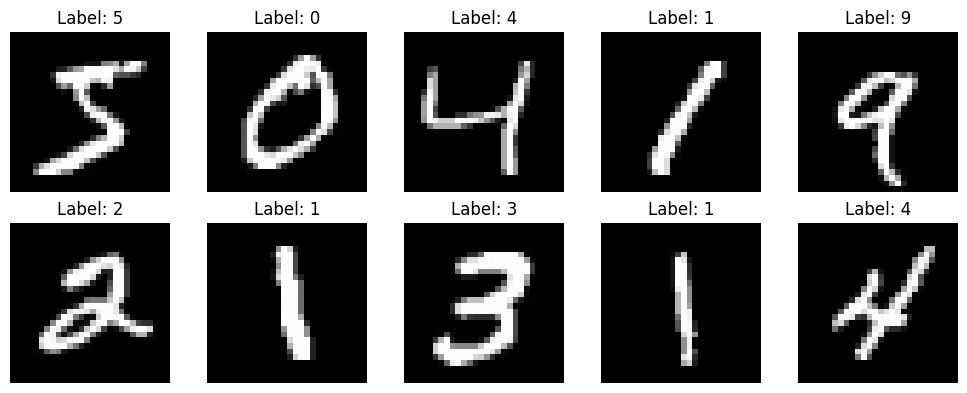

Data type of x_train: uint8
Minimum pixel value in x_train: 0
Maximum pixel value in x_train: 255


In [ ]:
import matplotlib.pyplot as plt

# Display a few sample images
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1) # Arrange in 2 rows, 5 columns
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f'Label: {y_train[i]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

# Check data type and value range
print(f"Data type of x_train: {x_train.dtype}")
print(f"Minimum pixel value in x_train: {x_train.min()}")
print(f"Maximum pixel value in x_train: {x_train.max()}")

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Data type of x_train after normalization: {x_train.dtype}")
print(f"Minimum pixel value in x_train after normalization: {x_train.min()}")
print(f"Maximum pixel value in x_train after normalization: {x_train.max()}")

print(f"Data type of x_test after normalization: {x_test.dtype}")
print(f"Minimum pixel value in x_test after normalization: {x_test.min()}")
print(f"Maximum pixel value in x_test after normalization: {x_test.max()}")

Data type of x_train after normalization: float32
Minimum pixel value in x_train after normalization: 0.0
Maximum pixel value in x_train after normalization: 1.0
Data type of x_test after normalization: float32
Minimum pixel value in x_test after normalization: 0.0
Maximum pixel value in x_test after normalization: 1.0


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print(f"Shape of x_train after reshaping: {x_train.shape}")
print(f"Shape of x_test after reshaping: {x_test.shape}")

Shape of x_train after reshaping: (60000, 28, 28, 1)
Shape of x_test after reshaping: (10000, 28, 28, 1)


In [ ]:
from tensorflow.keras.utils import to_categorical

# One-hot encode labels
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(f"Shape of y_train after one-hot encoding: {y_train.shape}")
print(f"Shape of y_test after one-hot encoding: {y_test.shape}")

Shape of y_train after one-hot encoding: (60000, 10)
Shape of y_test after one-hot encoding: (10000, 10)


In [ ]:
x_train_flat = x_train.reshape(x_train.shape[0], 28 * 28 * 1)
x_test_flat = x_test.reshape(x_test.shape[0], 28 * 28 * 1)

print(f"Shape of x_train_flat: {x_train_flat.shape}")
print(f"Shape of x_test_flat: {x_test_flat.shape}")

Shape of x_train_flat: (60000, 784)
Shape of x_test_flat: (10000, 784)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# 2. Create a Sequential model
mlp_model = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# 3. Compile the model
mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
mlp_model.summary()

# 4. Train the MLP model
history_mlp = mlp_model.fit(x_train_flat, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# 5. Evaluate the trained MLP model's performance
loss_mlp, accuracy_mlp = mlp_model.evaluate(x_test_flat, y_test, verbose=0)

print(f"\nMLP Test Loss: {loss_mlp:.4f}")
print(f"MLP Test Accuracy: {accuracy_mlp:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8269 - loss: 0.5489 - val_accuracy: 0.9590 - val_loss: 0.1389
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9511 - loss: 0.1651 - val_accuracy: 0.9695 - val_loss: 0.1015
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9638 - loss: 0.1220 - val_accuracy: 0.9720 - val_loss: 0.0931
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9690 - loss: 0.1020 - val_accuracy: 0.9742 - val_loss: 0.0940
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9719 - loss: 0.0877 - val_accuracy: 0.9763 - val_loss: 0.0809
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9763 - loss: 0.0775 - val_accuracy: 0.9749 - val_loss: 0.0856
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.9778 - loss: 0.0699 - val_accuracy: 0.9761 - val_loss: 0.0806
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9798 - loss: 0.0634

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# 2. Define CNN model architecture
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# 3. Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# 4. Print model summary
cnn_model.summary()

# 5. Train the CNN model
history_cnn = cnn_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# 6. Evaluate the trained CNN model's performance
loss_cnn, accuracy_cnn = cnn_model.evaluate(x_test, y_test, verbose=0)

# 7. Print the test loss and test accuracy
print(f"\nCNN Test Loss: {loss_cnn:.4f}")
print(f"CNN Test Accuracy: {accuracy_cnn:.4f}")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 28ms/step - accuracy: 0.8403 - loss: 0.4913 - val_accuracy: 0.9807 - val_loss: 0.0612
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9751 - loss: 0.0873 - val_accuracy: 0.9871 - val_loss: 0.0468
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 28ms/step - accuracy: 0.9814 - loss: 0.0624 - val_accuracy: 0.9896 - val_loss: 0.0388
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9853 - loss: 0.0489 - val_accuracy: 0.9896 - val_loss: 0.0351
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9879 - loss: 0.0403 - val_accuracy: 0.9898 - val_loss: 0.0369
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 40s 27ms/step - accuracy: 0.9894 - loss: 0.0350 - val_accuracy: 0.9901 - val_loss: 0.0354
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 27ms/step - accuracy: 0.9911 - loss: 0.0264 - val_accuracy: 0.9921 - val_loss: 0.0327
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 42s 28ms/step - accuracy: 0.9922 -

In [ ]:
print("\n--- Model Performance Comparison ---")
print(f"MLP Model Test Loss: {loss_mlp:.4f}")
print(f"MLP Model Test Accuracy: {accuracy_mlp:.4f}")
print(f"CNN Model Test Loss: {loss_cnn:.4f}")
print(f"CNN Model Test Accuracy: {accuracy_cnn:.4f}")


--- Model Performance Comparison ---
MLP Model Test Loss: 0.0697
MLP Model Test Accuracy: 0.9794
CNN Model Test Loss: 0.0259
CNN Model Test Accuracy: 0.9927


In [ ]:
from tensorflow.keras.models import save_model

mlp_model.save('mlp_model.keras')
cnn_model.save('cnn_model.keras')

print("MLP model saved to 'mlp_model.keras'")
print("CNN model saved to 'cnn_model.keras'")

MLP model saved to 'mlp_model.keras'
CNN model saved to 'cnn_model.keras'


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 105.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 124.3 MB/s eta 0:00:00


In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# 1. Load the pre-trained CNN model
# Ensure 'cnn_model.keras' is in the same directory as the Streamlit script
try:
    model = load_model('cnn_model.keras')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# 2. Define a function to preprocess an uploaded image
def preprocess_image(image):
    # Resize to 28x28 pixels
    image = image.resize((28, 28))
    # Convert to grayscale (if not already)
    image = image.convert('L') # 'L' mode for grayscale
    # Convert to numpy array
    img_array = np.array(image)
    # Normalize pixel values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    # Reshape to (1, 28, 28, 1) for model input
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# 3. Set up the Streamlit application title
st.title('MNIST Digit Recognizer')
st.write('Upload an image of a handwritten digit (0-9) to get a prediction.')

# 4. File uploader widget
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Make a prediction using the loaded CNN model
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Display the prediction results
    st.success(f'Prediction: The digit is **{predicted_class}**')
    st.info(f'Confidence: **{confidence:.2f}%**')

    st.write("--- Recommended usage: Save this code as a .py file (e.g., `app.py`) and run with `streamlit run app.py` in your terminal. Ensure 'cnn_model.keras' is in the same directory.")

/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-11-30 05:51:30.182 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:30.862 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-11-30 05:51:30.864 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:30.866 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:30.867 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:30.870

In [ ]:
import streamlit as st
from tensorflow.keras.models import load_model
import numpy as np
from PIL import Image

# 1. Load the pre-trained CNN model
# Ensure 'cnn_model.keras' is in the same directory as the Streamlit script
try:
    model = load_model('cnn_model.keras')
except Exception as e:
    st.error(f"Error loading the model: {e}")
    st.stop()

# 2. Define a function to preprocess an uploaded image
def preprocess_image(image):
    # Resize to 28x28 pixels
    image = image.resize((28, 28))
    # Convert to grayscale (if not already)
    image = image.convert('L') # 'L' mode for grayscale
    # Convert to numpy array
    img_array = np.array(image)
    # Normalize pixel values to [0, 1]
    img_array = img_array.astype('float32') / 255.0
    # Reshape to (1, 28, 28, 1) for model input
    img_array = np.expand_dims(img_array, axis=-1)
    img_array = np.expand_dims(img_array, axis=0)
    return img_array

# 3. Set up the Streamlit application title
st.title('MNIST Digit Recognizer')
st.write('Upload an image of a handwritten digit (0-9) to get a prediction.')

# 4. File uploader widget
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    # Display the uploaded image
    image = Image.open(uploaded_file)
    st.image(image, caption='Uploaded Image', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    processed_image = preprocess_image(image)

    # Make a prediction using the loaded CNN model
    prediction = model.predict(processed_image)
    predicted_class = np.argmax(prediction)
    confidence = np.max(prediction) * 100

    # Display the prediction results
    st.success(f'Prediction: The digit is **{predicted_class}**')
    st.info(f'Confidence: **{confidence:.2f}%**')

    st.write("--- Recommended usage: Save this code as a .py file (e.g., `app.py`) and run with `streamlit run app.py` in your terminal. Ensure 'cnn_model.keras' is in the same directory.")


/usr/local/lib/python3.12/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
2025-11-30 05:51:42.092 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:42.094 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:42.097 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:42.100 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:42.101 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-30 05:51:42.104 Thread 'MainThread': missing ScriptRunContext! This warning can be ign

In [ ]:
print("The Streamlit application script has been successfully generated and is ready to be saved externally. The warnings observed are informational when running Streamlit code within Colab and do not indicate an issue for external deployment. The generated script correctly fulfills the subtask instructions.")

The Streamlit application script has been successfully generated and is ready to be saved externally. The warnings observed are informational when running Streamlit code within Colab and do not indicate an issue for external deployment. The generated script correctly fulfills the subtask instructions.
